In [1]:
from __future__ import division  
import numpy as np  
from numpy import linalg
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from metodos import *

In [2]:
MAX_ITE = 2000
a = -4
b = 1
c = 1

# h = k = 0.25
# M = N = 4

# h = k = 0.05
# M = N = 20

h = k = 0.025
M = N = 40

# np.diag(a*np.ones((N-1)*(M-1)), k=0)
A = np.zeros(((N) * (M-1), (N) * (M-1)))
ii = 0
for i in range(1, N+1):
    for j in range(1, M):
#         print(i, j)
        if i+1 == N+1: # Ponto Fantasma
#             print(ii)
            A[ii][((i-2)*(N-1)) + j-1] += 1
        if i+1 < N+1:
            A[ii][((i)*(N-1)) + j-1] += 1
#         if i+1 == N+1:
#             A[ii][((i)*(N-1)) + j-1] += 1
        if i-1 != 0:
            A[ii][((i-2)*(N-1)) + j-1] += 1
        A[ii][(i-1)*(N-1) + j-1] += a
        if j+1 != M:
            A[ii][((i-1)*(N-1)) + j] += 1
        if j-1 != 0:
            A[ii][((i-1)*(N-1)) + j - 2] += 1
        ii += 1

# print(A)
# for i in range(len(A)):
#     for j in range(len(A)):
#         print(int(A[i,j]), end=' ')
#     print("")

In [3]:
r = np.zeros(((N) * (M-1), 1))
ii = 0
for i in range(1, N+1):
    for j in range(1, M):
        if i+1 == N:
            r[ii][0] -= 0
        if i-1 == 0:
            r[ii][0] -= 75
        if j+1 == M:
            r[ii][0] -= 0
        if j-1 == 0:
            r[ii][0] -= 50
#         print(ii)
        ii += 1
# print(r)
# for j in range(len(r)):
#     print(str(int(r[j][0]))+"\\\\")

U = np.zeros((N * (M-1),1))

# for i in range(1, N+1):
#     for j in range(1, M):
#         print("U_{"+str(i)+","+str(j)+"}\\\\")
        
# print(U)


In [4]:
D = np.diag(np.diag(A))
S = np.triu(A, k=1)
L = np.tril(A, k=-1)

In [5]:

# print_tabela(Ur, M, N)
# print(Ur)

In [6]:
def gera_res(U, M, N):
    u = np.zeros((M+1, N+1))
    for j in range(M, -1, -1):
        for i in range(0, N+1):
            if (i == 0 and j == M) or (i == 0 and j == 0):
                continue
            if j == M:
                u[j][i] = 0
            elif j == 0:
                u[j][i] = 50
            elif i == 0:
                u[j][i] = 75
            else:
                u[j][i] = U[(i-1)*(N-1) + j-1][0]
    return u
def print_tabela(U, M, N):
    for j in range(M, -1, -1):
        for i in range(0, N+1):
            if (i == 0 and j == M) or (i == 0 and j == 0):
                print("       ", end=' &\t')
                continue
            if j == M:
                print("", 0, "     ", end='&\t')
            elif j == 0:
                print("{:.1f}".format(50), end='\t&\t')
            elif i == 0:
                print("{:.1f}".format(75), end='\t&\t')
            else:
    #             print("ij:", i, j, "\n")
                print("{:.4f}".format(U[(i-1)*(N-1) + j-1][0]), end='\t&\t')
        print("")

In [7]:
print("Jacobi")
Ur, ite, error, tempo = jacobi(S, D, L, r, U, 1e-3, MAX_ITE)
print_tabela(Ur, M, N)
# print(Ur)
print("Iterações: ", ite)
print("Erro: ", error)
print("Tempo: ", tempo)
res = gera_res(Ur, M, N)
# print(res)

Jacobi
        &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	
75.0	&	37.4978	&	22.6716	&	15.6978	&	11.8789	&	9.5247	&	7.9414	&	6.8069	&	5.9553	&	5.2930	&	4.7637	&	4.3313	&	3.9719	&	3.6688	&	3.4102	&	3.1873	&	2.9936	&	2.8241	&	2.6749	&	2.5429	&	2.4258	&	2.3214	&	2.2283	&	2.1450	&	2.0704	&	2.0036	&	1.9438	&	1.8903	&	1.8426	&	1.8002	&	1.7626	&	1.7295	&	1.7007	&	1.6757	&	1.6545	&	1.6369	&	1.6227	&	1.6117	&	1.6039	&	1.5993	&	1.5977	&	
75.0	&	52.3194	&	37.4911	&	28.2405	&	22.2933	&	18.2787	&	15.4340	&	13.3313	&	11.7215	&	10.4534	&	9.4307	&	8.5900	&	7.8879	&	7.2936	&	6.7850	&	6.3458	&	5.9633	&	5.6282	&	5.3329	&	5.0715	&	4.8392	&	4.6322	&	4.447

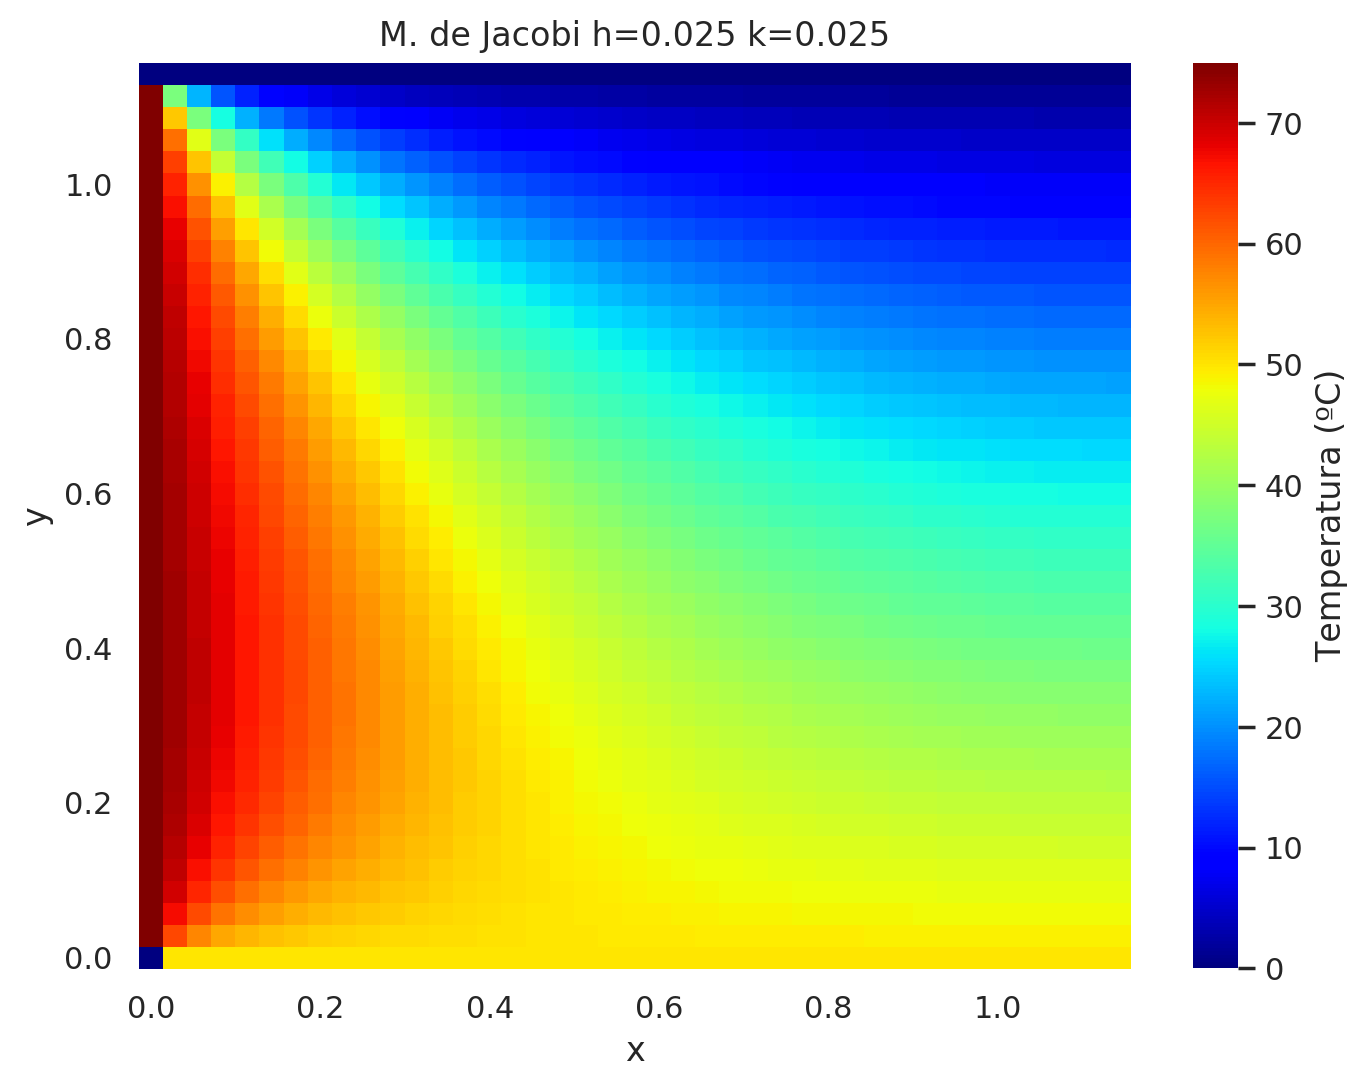

In [10]:
print_res(res, M, N, 0, 1, 1, h, k, metodo="M. de Jacobi", print_annot=False)

Gauss-Seidel
        &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	 0      &	
75.0	&	37.5014	&	22.6789	&	15.7086	&	11.8934	&	9.5427	&	7.9629	&	6.8320	&	5.9839	&	5.3250	&	4.7991	&	4.3700	&	4.0138	&	3.7139	&	3.4584	&	3.2386	&	3.0478	&	2.8812	&	2.7348	&	2.6055	&	2.4910	&	2.3891	&	2.2984	&	2.2174	&	2.1450	&	2.0802	&	2.0224	&	1.9707	&	1.9247	&	1.8838	&	1.8477	&	1.8159	&	1.7883	&	1.7644	&	1.7441	&	1.7272	&	1.7136	&	1.7031	&	1.6957	&	1.6913	&	1.6898	&	
75.0	&	52.3267	&	37.5055	&	28.2622	&	22.3222	&	18.3147	&	15.4770	&	13.3813	&	11.7785	&	10.5171	&	9.5012	&	8.6671	&	7.9714	&	7.3835	&	6.8812	&	6.4480	&	6.0715	&	5.7421	&	5.4524	&	5.1964	&	4.9693	&	4.7672	&

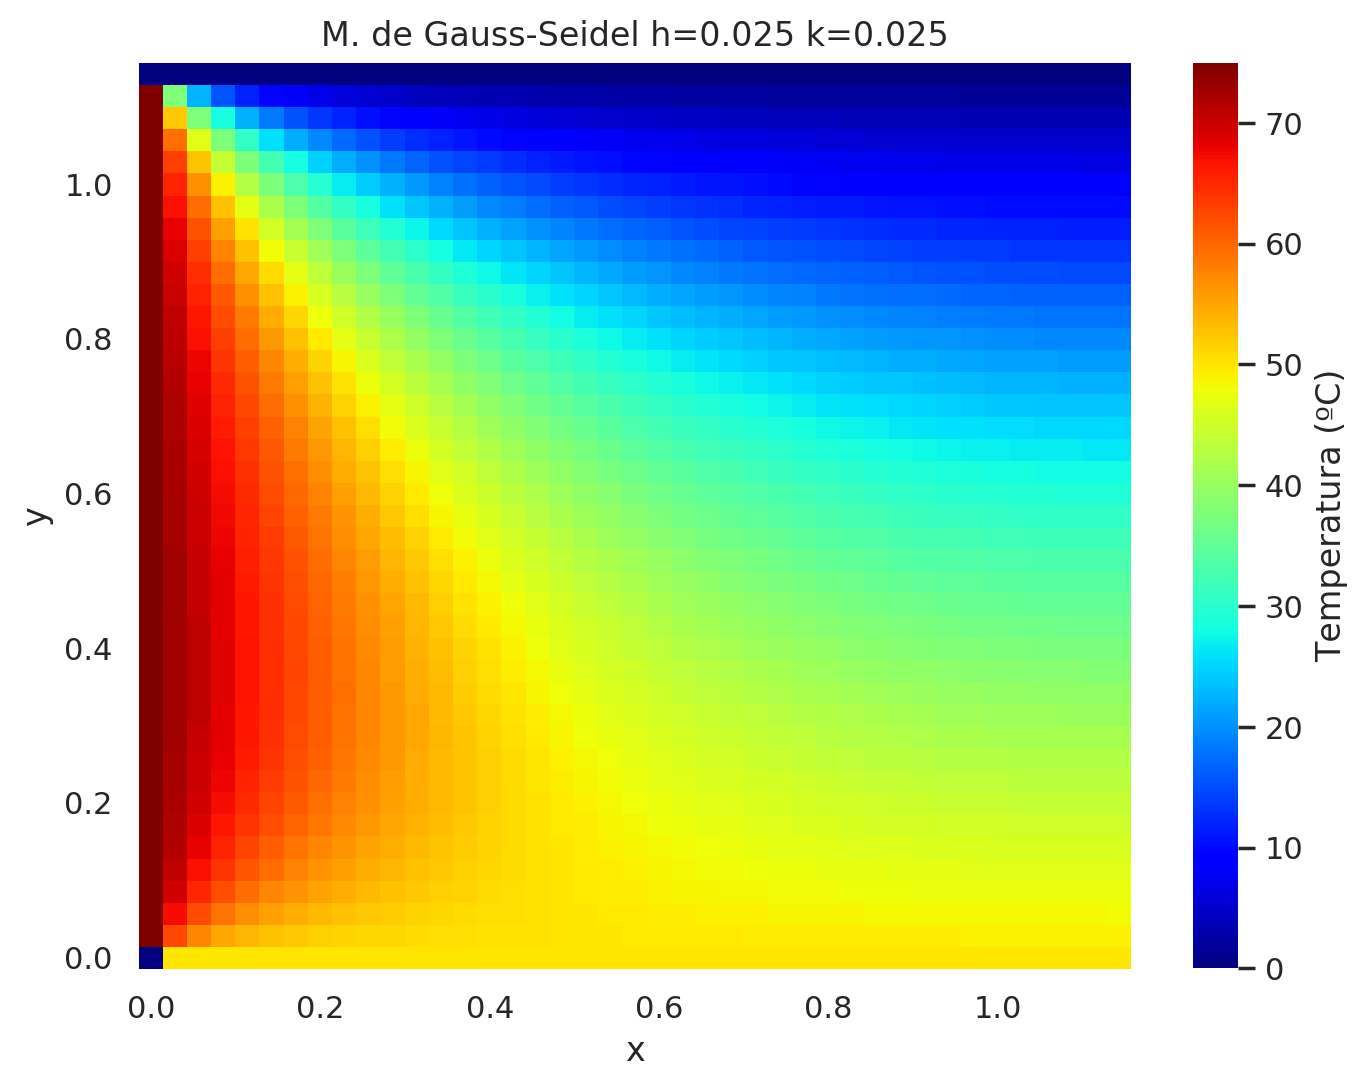

In [11]:
print("Gauss-Seidel")
Ur, ite, error, tempo = gauss_seidel(S, D, L, r, U, 1e-3, MAX_ITE)
# print_tabela(Ur, M, N)
# print(Ur)
print("Iterações: ", ite)
print("Erro: ", error)
print("Tempo: ", tempo)
res = gera_res(Ur, M, N)

# print(res)
print_res(res, M, N, 0, 1, 1, h, k, metodo="M. de Gauss-Seidel", print_annot=False)

0.99675212332708
1.8509422023650053
Iterações:  186
Erro:  0.0009600786110771362
Tempo:  1.33198881149292


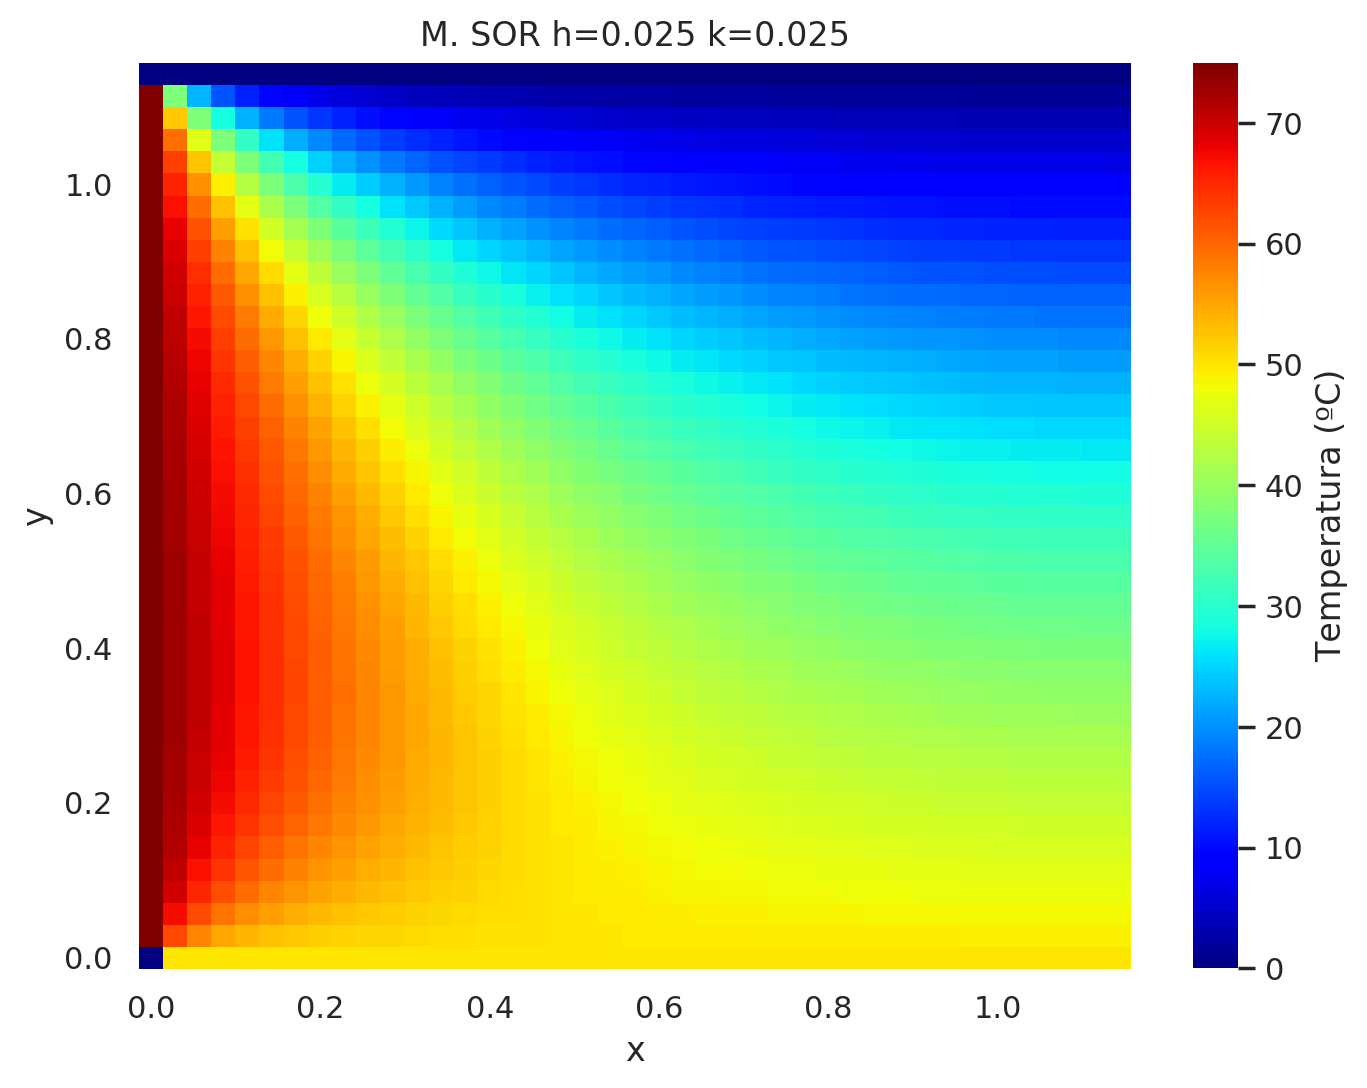

In [12]:
Di = np.linalg.inv(D)

J_t = np.dot(Di, L+S)
autovalores = np.linalg.eigvalsh(J_t)
# autovalores = list(filter(lambda x: x is not complex, autovalores))
# print(autovalores)
# array_to_bmatrix(autovalores)
# print(autovalores)
autovalores = list(filter(lambda x: x <= 1, list(filter(lambda x: x is not complex, autovalores))))
rho = np.max(autovalores)
print(rho)
w = 1 + (rho/(1+np.sqrt(1-rho**2)))**2
# w = 2/(1+np.sqrt(1-rho**2))
print(w)


# print("SOR")
Ur, ite, error, tempo = SOR(S, D, L, r, U, w, 1e-3, MAX_ITE)
# print_tabela(Ur, M, N)


# # print(Ur)
print("Iterações: ", ite)
print("Erro: ", error)
print("Tempo: ", tempo)
res = gera_res(Ur, M, N)

# # print(res)
print_res(res, M, N, 0, 1, 1, h, k, metodo="M. SOR", print_annot=False)

In [ ]:
# Ur, ite, error, tempo = SOR(S, D, L, r, U, w, 1e-3, MAX_ITE)
# print("Iterações: {} - w: {}: ".format(ite, w))
# print(tempo)
# ws = np.linspace(0,2, int(2/0.2)+1)

# for w in ws[1:]:
#     Ur, ite, error, tempo = SOR(S, D, L, r, U, w, 1e-3, MAX_ITE)
#     print("Iterações: {} - w: {}: ".format(ite, w))
#     print("Erro: ", error)